In [20]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import ARMA
from statsmodels.tsa.stattools import ARMA

In [21]:
data =pd.read_csv("/content/drive/MyDrive/all_stocks_5yr.csv")

In [22]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [23]:
data = data[data.Name == 'AAL']

In [24]:
data.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL
1258,2018-02-07,50.91,51.98,50.89,51.40,4845831,AAL


In [25]:
log_returns = np.log(1 + data.close.pct_change())
u = log_returns.mean() #Mean of the logarithmich return
var = log_returns.var() #Variance of the logarithic return
drift = u - (0.5 * var) #drift / trend of the logarithmic return
stdev = log_returns.std() #Standard deviation of the log return


t_intervals = 250 #I just wanted to forecast 250 time points
iterations = 10 #I wanted to have 10 different forecast

daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))

In [26]:
S0 = data.close.iloc[-1]
S0

51.4

In [27]:
price_list = np.zeros_like(daily_returns)
price_list[0] = S0
price_list

array([[51.4, 51.4, 51.4, ..., 51.4, 51.4, 51.4],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

In [28]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
price_list = pd.DataFrame(price_list)
price_list['close'] = price_list[0]
price_list.head()

,0,1,2,3,4,5,6,7,8,9,close
0,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000,51.400000
1,50.984360,51.562115,52.740306,51.638592,50.351673,51.768559,51.946137,52.490729,51.410478,50.396913,50.984360
2,51.736345,52.595425,51.492384,51.427764,50.575777,49.874831,51.712616,52.506241,50.523961,51.136856,51.736345
3,50.377637,52.012371,50.176431,52.362850,51.006749,48.661600,52.324307,50.767229,52.764058,51.012979,50.377637
4,50.266087,52.672754,49.206481,53.044120,50.317503,48.996041,51.898083,51.802420,52.389820,51.385784,50.266087


In [29]:
close = data.close
close = pd.DataFrame(close)
frames = [close, price_list]
monte_carlo_forecast = pd.concat(frames)

In [30]:
monte_carlo_forecast.head()

,close,0,1,2,3,4,5,6,7,8,9
0,14.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


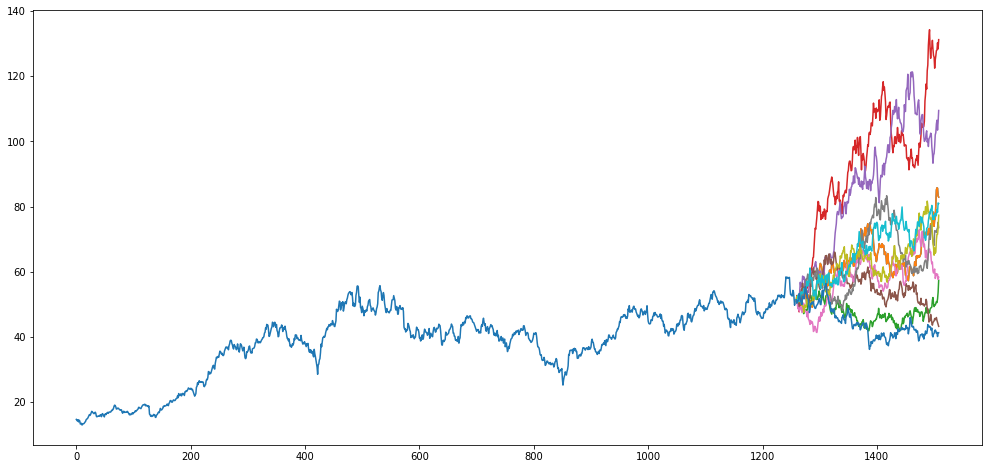

In [31]:
monte_carlo = monte_carlo_forecast.iloc[:,:].values
plt.figure(figsize=(17,8))
plt.plot(monte_carlo)
plt.show()

In [32]:
#!pip install plotly==3.10.0

In [ ]:
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

trace = go.Histogram(x=log_returns,opacity=0.85,name = "Logarithmic Return", marker=dict(color='rgba(0, 0, 255, 0.8)'))
info = [trace]
layout = go.Layout(barmode='overlay',
                   title='Distribution of the Logarithmic Returns',
                   xaxis=dict(title='Logarithmic Return'),
                   yaxis=dict( title='Dist'),
)
fig = go.Figure(data=info, layout=layout)
iplot(fig)

In [34]:
data['log_return'] = np.log(1 + data.close.pct_change())
data.reset_index(inplace=True)
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data.head()

,index,open,high,low,close,volume,Name,log_return
date,,,,,,,,
2013-02-08,0,15.07,15.12,14.63,14.75,8407500,AAL,NaN
2013-02-11,1,14.89,15.01,14.26,14.46,8882000,AAL,-0.019857
2013-02-12,2,14.45,14.51,14.10,14.27,8126000,AAL,-0.013227
2013-02-13,3,14.30,14.94,14.25,14.66,10259500,AAL,0.026963
2013-02-14,4,14.94,14.96,13.16,13.99,31879900,AAL,-0.046780


In [35]:
data = data.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



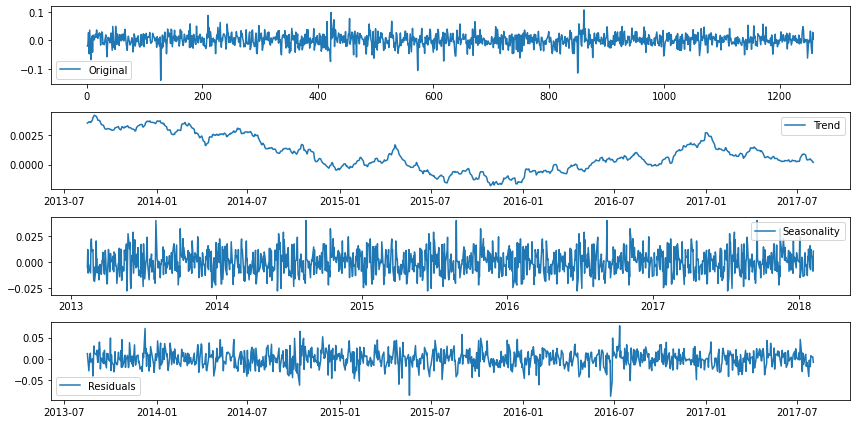

In [36]:
decomposition = seasonal_decompose(data.log_return, freq = 260) #Was there 260 workdays in a year?
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,6))
plt.subplot(411)
plt.plot(log_returns, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

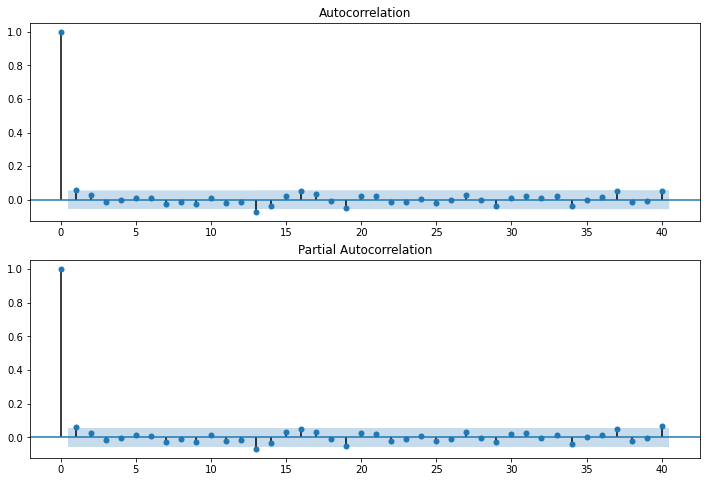

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.log_return, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.log_return, lags=40, ax=ax2)
plt.show()

In [ ]:
def best_AR_MA_checker(df,lower,upper):
    from statsmodels.tsa.stattools import ARMA
    from statsmodels.tsa.stattools import adfuller
    arg=np.arange(lower,upper)
    arg1=np.arange(lower,upper)
    best_param_i=0
    best_param_j=0
    temp=12000000
    rs=99
    for i in arg:
        for j in arg1:
            model=ARMA(df, order=(i,0,j))
            result=model.fit(disp=0)
            resid=adfuller(result.resid)
            if (result.aic<temp and  adfuller(result.resid)[1]<0.05):
                temp=result.aic
                best_param_i=i
                best_param_j=j
                rs=resid[1]
                
                
            print ("AR: %d, MA: %d, AIC: %d; resid stationarity check: %d"%(i,j,result.aic,resid[1]))
            
    print("the following function prints AIC criteria and finds the paramters for minimum AIC criteria")        
    print("best AR: %d, best MA: %d, best AIC: %d;  resid stationarity check:%d"%(best_param_i, best_param_j, temp, rs))     
best_AR_MA_checker(data.log_return,0,3)

In [39]:
model=ARMA(data.log_return, order=(1,0))
res=model.fit(disp=0)
print (res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                              ARMA Model Results                              
Dep. Variable:             log_return   No. Observations:                 1258
Model:                     ARMA(1, 0)   Log Likelihood                2991.154
Method:                       css-mle   S.D. of innovations              0.022
Date:                Tue, 27 Sep 2022   AIC                          -5976.308
Time:                        12:13:37   BIC                          -5960.896
Sample:                             0   HQIC                         -5970.516
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0010      0.001      1.476      0.140      -0.000       0.002
ar.L1.log_return     0.0582      0.028      2.066      0.039       0.003       0.113
                            